In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
import os

In [3]:
os.listdir('../input/land8images')

['LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif']

In [4]:
band4 = rasterio.open('../input/land8images/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') #red
band5 = rasterio.open('../input/land8images/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') #nir

In [5]:
band4.height

1338

In [6]:
band4.width

2107

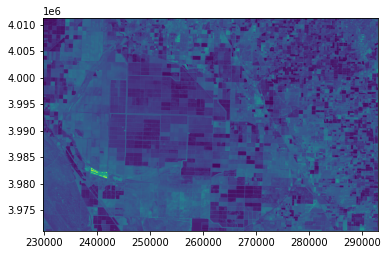

<AxesSubplot:>

In [7]:
plot.show(band4)

In [8]:
band4.dtypes

('uint16',)

In [9]:
band4.crs

CRS.from_epsg(32611)

In [10]:
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [11]:
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

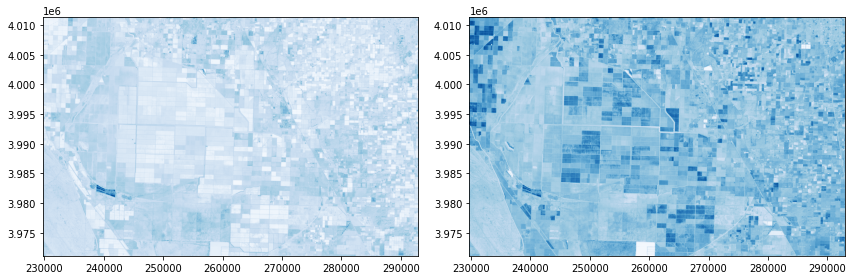

In [12]:
#multiple band represation
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
plot.show(band4,ax=ax1, cmap='Blues') #red
plot.show(band5,ax=ax2, cmap='Blues') #nir
fig.tight_layout()


In [13]:
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[24079., 24061., 24131., ...,  9747., 10231., 11190.],
       [24169., 24213., 24173., ...,  9900., 10084., 10855.],
       [24253., 24438., 24265., ...,  9910., 10079., 11592.],
       ...,
       [21594., 20611., 20397., ..., 20179., 20035., 19973.],
       [21441., 20507., 19362., ..., 20189., 19976., 19941.],
       [21080., 20536., 20172., ..., 20531., 20744., 20915.]])

In [14]:
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi

array([[0.52601559, 0.525987  , 0.5271335 , ..., 0.04151306, 0.05381882,
        0.06373877],
       [0.52721873, 0.52758588, 0.52751975, ..., 0.04496517, 0.04850533,
        0.05788909],
       [0.52774803, 0.53187488, 0.52999779, ..., 0.04178712, 0.04831244,
        0.06602906],
       ...,
       [0.1105454 , 0.11332577, 0.11401185, ..., 0.27119819, 0.27566776,
        0.2792135 ],
       [0.11084631, 0.1142081 , 0.11648022, ..., 0.2695089 , 0.27830038,
        0.28419629],
       [0.10991181, 0.12335211, 0.12403878, ..., 0.24283423, 0.23340369,
        0.22729807]])

In [15]:
os.listdir('../input/land8images')


['LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif']

In [16]:
ndviImage = rasterio.open ('../ndviImage.tif',
                          'w',
                          driver='GTiff',
                          width=band4.width,
                          height=band4.height,
                          count=1,
                          crs=band4.crs,
                          transform=band4.transform,
                          dtype='float64'
                          )
